In [1]:
shape_cat=""
vol=""
z_range=""
key=""
quantile=""

In [2]:
# Parameters
shape_cat = "im3"
vol = "all"
z_range = "all_z"
key = "lambda"
quantile = "2"


In [3]:
#This header file contains all the common packages
%matplotlib inline
%run /home/cz136/project/sa/lib/src/header.py $shape_cat $vol $z_range 
%run -i /home/cz136/project/sa/lib/src/func.py  

In [4]:
if quantile!="":
    i=int(quantile)

In [5]:
if key=="lambda":
    key=('All','All','LAMBDA_CHISQ')
elif key=="z":
    key=('All','All','Z_LAMBDA')

In [6]:
def thirds_by_key(catalog,key):
    step0=catalog[key].quantile(0.0)
    step1=catalog[key].quantile(0.333333)
    step2=catalog[key].quantile(0.666666)
    step3=catalog[key].quantile(1)
    
    catalog1=catalog[(catalog[key]>step0) & (catalog[key]<step1)]
    catalog2=catalog[(catalog[key]>step1) & (catalog[key]<step2)]
    catalog3=catalog[(catalog[key]>step2) & (catalog[key]<step3)]
    
    return (catalog1,catalog2,catalog3)

In [7]:
if key!="":
    clusters_list=thirds_by_key(clusters,key)
    clusters=clusters_list[i]

In [8]:
sep="------------------------------------------------------------------------------"
np.set_printoptions(precision=4)

In [9]:
NBINS=10

In [10]:
import treecorr
import astropy.cosmology
from fastprogress import master_bar, progress_bar
from ipywidgets import FloatProgress
from IPython.display import display
from tqdm import tqdm

In [11]:
if key=="":
    assert np.isin(shapes['All','MEM_MATCH_ID'].to_numpy(),clusters.index.to_numpy()).all()==True

In [12]:
def get_ng(cluster,mode1,mode2):
    if mode2=="abs":
        UPPER_BOUND=np.max(shapes[('All','R')])
        distance=('All','angR')
        
    elif mode2=="rel":
        UPPER_BOUND=1.2
        distance=('All','normLR')
    else:
        raise

    if mode1 == "s":
        def get_cluster_cen(cluster):
            return (get_unique_center_for_cluster(cluster))
        def get_cluster_sats(cluster):
            cen_mat_id=cluster.name
            cen_id=cluster[('Alt','Alt1','ID_CENT')]
            sats=shapes[shapes['All','MEM_MATCH_ID']==cen_mat_id]
            sats=sats[sats.index!=cen_id]
            return (sats)
    elif mode1=='r':
        def get_cluster_sats(cluster):
            return(shapes)
        def get_cluster_cen(cluster):
            return (random)

    else:
        raise


    cen=get_cluster_cen(cluster)
    sats=get_cluster_sats(cluster)


    sats_e1=sats[('All','e1')].to_numpy()
    sats_e2=sats[('All','e2')].to_numpy()
    sats_angr=sats[distance]

#     print(sats_e1,sats_e2)

    if type(cen[('All','RA')])==np.float64:
        cen_angr=np.array(cen[distance]).reshape(1)
        cen_ra=np.array(cen[('All','RA')]).reshape(1)
        cen_dec=np.array(cen[('All','DEC')]).reshape(1)
    else:
#         cen_e1=cen[('All','e1')].to_numpy
#         cen_e2=cen[('All','e2')].to_numpy()
        cen_angr=cen[distance].to_numpy()
        cen_ra=cen[('All','RA')].to_numpy()
        cen_dec=cen[('All','DEC')].to_numpy()




#     print(cen_e1,cen_e2)

    sats_ra=sats[('All','RA')].to_numpy()
    sats_dec=sats[('All','DEC')].to_numpy()




#     print(np.shape(cen_ra),np.shape(cen_dec))    
#     print(cen_ra,cen_dec)    

    sats_cat = treecorr.Catalog( g1 = sats_e1, g2   = sats_e2, 
                                 ra = sats_ra, dec = sats_dec,r=sats_angr,
                                 ra_units='deg', dec_units='deg')

    cen_cat = treecorr.Catalog( 
                                 ra = cen_ra, dec = cen_dec, r=cen_angr,
                                 ra_units='deg', dec_units='deg')

    ng = treecorr.NGCorrelation(nbins=NBINS, min_sep=0.01, max_sep=UPPER_BOUND, bin_slop=0.0,
                               metric="Rperp")
    ng.process_cross(cen_cat,sats_cat)

    return(ng)

In [13]:
def get_xi_meanlogr_varxi_npairs(cluster,mode1,mode2):
    ng=get_ng(cluster,mode1,mode2)
    return(np.array([ng.xi,ng.meanlogr,ng.varxi,ng.npairs]))

In [14]:
length=len(clusters)

def get_ng_list(mode2):
    ng_list=np.empty([length,4,NBINS])
    filler=np.zeros([1,4,NBINS])

    i=0
    e_count=0
    for index,cluster in tqdm(clusters.iterrows()):
        try:
            ng_list[i,:,:]=get_xi_meanlogr_varxi_npairs(cluster,'s',mode2)
            i=i+1
        except ValueError as e:
            ng_list[i,:,:]=filler
            i=i+1
            e_count=e_count+1
    print("Number of empty sat catalogs is {}".format(e_count))
    return (ng_list)

In [15]:
ng_abs=get_ng_list('abs')
ng_rel=get_ng_list('rel')

0it [00:00, ?it/s]

11it [00:00, 105.55it/s]

27it [00:00, 116.39it/s]

43it [00:00, 126.64it/s]

57it [00:00, 128.27it/s]

68it [00:00, 111.73it/s]

82it [00:00, 118.79it/s]

98it [00:00, 126.92it/s]

111it [00:00, 127.83it/s]

127it [00:00, 135.27it/s]

143it [00:01, 141.75it/s]

158it [00:01, 123.86it/s]

172it [00:01, 126.79it/s]

187it [00:01, 132.70it/s]

202it [00:01, 136.31it/s]

218it [00:01, 140.44it/s]

233it [00:01, 143.02it/s]

248it [00:01, 144.36it/s]

263it [00:01, 145.68it/s]

278it [00:02, 144.85it/s]

293it [00:02, 145.17it/s]

308it [00:02, 128.29it/s]

322it [00:02, 130.90it/s]

338it [00:02, 136.98it/s]

352it [00:02, 123.22it/s]

367it [00:02, 128.58it/s]

382it [00:02, 133.71it/s]

396it [00:02, 125.20it/s]

411it [00:03, 128.13it/s]

425it [00:03, 129.30it/s]

441it [00:03, 135.38it/s]

457it [00:03, 140.11it/s]

472it [00:03, 142.86it/s]

488it [00:03, 145.83it/s]

504it [00:03, 149.13it/s]

520it [00:03, 146.15it/s]

535it [00:03, 146.89it/s]

550it [00:04, 147.74it/s]

566it [00:04, 149.07it/s]

582it [00:04, 150.96it/s]

598it [00:04, 153.23it/s]

614it [00:04, 153.83it/s]

630it [00:04, 153.71it/s]

646it [00:04, 154.98it/s]

662it [00:04, 154.89it/s]

678it [00:04, 154.36it/s]

694it [00:04, 154.31it/s]

710it [00:05, 153.29it/s]

726it [00:05, 154.28it/s]

742it [00:05, 154.63it/s]

758it [00:05, 152.77it/s]

774it [00:05, 150.17it/s]

790it [00:05, 149.80it/s]

805it [00:05, 148.96it/s]

821it [00:05, 149.31it/s]

836it [00:05, 145.62it/s]

852it [00:05, 148.24it/s]

868it [00:06, 151.23it/s]

884it [00:06, 153.72it/s]

900it [00:06, 154.10it/s]

916it [00:06, 152.05it/s]

932it [00:06, 152.38it/s]

948it [00:06, 154.15it/s]

964it [00:06, 155.05it/s]

980it [00:06, 154.55it/s]

996it [00:06, 153.50it/s]

1012it [00:07, 139.57it/s]

1027it [00:07, 140.10it/s]

1043it [00:07, 143.86it/s]

1060it [00:07, 147.77it/s]

1075it [00:07, 147.56it/s]

1090it [00:07, 123.73it/s]

1106it [00:07, 130.85it/s]

1122it [00:07, 137.67it/s]

1138it [00:07, 142.54it/s]

1154it [00:08, 145.31it/s]

1169it [00:08, 137.49it/s]

1184it [00:08, 125.55it/s]

1197it [00:08, 117.04it/s]

1210it [00:08, 110.44it/s]

1225it [00:08, 119.37it/s]

1241it [00:08, 127.76it/s]

1257it [00:08, 133.99it/s]

1271it [00:09, 130.42it/s]

1285it [00:09, 132.19it/s]

1301it [00:09, 139.25it/s]

1317it [00:09, 144.79it/s]

1332it [00:09, 143.86it/s]

1349it [00:09, 148.55it/s]

1366it [00:09, 152.87it/s]

1382it [00:09, 154.86it/s]

1399it [00:09, 156.53it/s]

1415it [00:10, 133.93it/s]

1431it [00:10, 139.82it/s]

1446it [00:10, 139.46it/s]

1461it [00:10, 140.47it/s]

1477it [00:10, 144.25it/s]

1493it [00:10, 147.48it/s]

1509it [00:10, 149.16it/s]

1525it [00:10, 152.02it/s]

1541it [00:10, 152.94it/s]

1557it [00:10, 154.34it/s]

1573it [00:11, 132.92it/s]

1576it [00:11, 141.72it/s]


0it [00:00, ?it/s]

10it [00:00, 93.69it/s]

Number of empty sat catalogs is 23


23it [00:00, 102.21it/s]

40it [00:00, 115.16it/s]

56it [00:00, 124.63it/s]

69it [00:00, 125.03it/s]

86it [00:00, 134.16it/s]

103it [00:00, 141.19it/s]

120it [00:00, 147.15it/s]

136it [00:00, 150.32it/s]

152it [00:01, 151.99it/s]

168it [00:01, 146.81it/s]

185it [00:01, 150.72it/s]

201it [00:01, 144.71it/s]

218it [00:01, 149.69it/s]

234it [00:01, 146.30it/s]

250it [00:01, 148.29it/s]

265it [00:01, 143.88it/s]

280it [00:01, 126.51it/s]

294it [00:02, 125.52it/s]

307it [00:02, 111.12it/s]

321it [00:02, 117.06it/s]

337it [00:02, 127.07it/s]

353it [00:02, 133.78it/s]

370it [00:02, 142.08it/s]

386it [00:02, 146.01it/s]

403it [00:02, 150.22it/s]

419it [00:02, 151.47it/s]

435it [00:03, 153.71it/s]

452it [00:03, 156.18it/s]

468it [00:03, 148.45it/s]

484it [00:03, 120.84it/s]

499it [00:03, 128.24it/s]

514it [00:03, 133.88it/s]

529it [00:03, 115.53it/s]

545it [00:03, 124.60it/s]

561it [00:04, 133.09it/s]

578it [00:04, 141.37it/s]

595it [00:04, 146.38it/s]

612it [00:04, 150.55it/s]

628it [00:04, 143.16it/s]

645it [00:04, 148.65it/s]

661it [00:04, 131.76it/s]

675it [00:04, 133.84it/s]

692it [00:04, 141.16it/s]

708it [00:05, 146.25it/s]

725it [00:05, 151.48it/s]

742it [00:05, 154.86it/s]

759it [00:05, 157.43it/s]

776it [00:05, 159.48it/s]

793it [00:05, 159.67it/s]

810it [00:05, 160.74it/s]

827it [00:05, 162.88it/s]

844it [00:05, 161.43it/s]

861it [00:05, 160.57it/s]

878it [00:06, 141.45it/s]

895it [00:06, 147.11it/s]

911it [00:06, 150.74it/s]

927it [00:06, 153.35it/s]

944it [00:06, 156.32it/s]

961it [00:06, 159.25it/s]

978it [00:06, 156.88it/s]

995it [00:06, 158.60it/s]

1011it [00:06, 158.17it/s]

1027it [00:07, 134.42it/s]

1044it [00:07, 141.70it/s]

1061it [00:07, 146.75it/s]

1078it [00:07, 151.82it/s]

1094it [00:07, 151.11it/s]

1111it [00:07, 154.40it/s]

1127it [00:07, 147.37it/s]

1142it [00:07, 128.09it/s]

1158it [00:08, 135.01it/s]

1175it [00:08, 142.62it/s]

1192it [00:08, 148.13it/s]

1208it [00:08, 149.12it/s]

1224it [00:08, 150.72it/s]

1240it [00:08, 152.76it/s]

1256it [00:08, 128.42it/s]

1270it [00:08, 118.13it/s]

1283it [00:08, 119.82it/s]

1300it [00:09, 129.92it/s]

1316it [00:09, 136.79it/s]

1331it [00:09, 136.89it/s]

1346it [00:09, 138.64it/s]

1363it [00:09, 145.14it/s]

1378it [00:09, 145.73it/s]

1395it [00:09, 151.01it/s]

1412it [00:09, 153.82it/s]

1429it [00:09, 156.69it/s]

1446it [00:10, 157.59it/s]

1463it [00:10, 159.44it/s]

1480it [00:10, 155.27it/s]

1496it [00:10, 155.26it/s]

1513it [00:10, 156.97it/s]

1530it [00:10, 159.80it/s]

1547it [00:10, 160.80it/s]

1564it [00:10, 162.66it/s]

1576it [00:10, 144.97it/s]

Number of empty sat catalogs is 23


In [16]:
try:
    ng_r=get_xi_meanlogr_varxi_npairs(clusters,'r','abs')
except ValueError as e:
    print(e)
    ng_r=np.array([[1],[1],[1],[1]])

In [17]:
# ng_list=np.load("/home/cz136/project/sa/data/{}/ng_list_cross.npy".format(dir_string))
# ng_r=np.load("/home/cz136/project/sa/data/{}/ng_r_list_cross.npy".format(dir_string))

In [18]:
def get_sum(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross,sum_meanlogr,sum_npairs)

def get_mean(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross/sum_npairs,sum_meanlogr/sum_npairs)

In [19]:
def get_sigma(ng_list):
    xi_array=ng_list[:,0,:]
    npairs_array=ng_list[:,3,:]
    
    N=len(xi_array)
    
    jk_xi_array=np.empty([N,NBINS])
    
    def get_xi(drop_1_xi,drop_1_npairs):
        return(np.sum(drop_1_xi,axis=0)/np.sum(drop_1_npairs,axis=0))
    
    for i in range(N):
        drop_1_xi=np.delete(xi_array,i,axis=0)
        drop_1_npairs=np.delete(npairs_array,i,axis=0)
        jk_xi_array[i,:]=get_xi(drop_1_xi,drop_1_npairs)
        
    return(np.sqrt(N)*np.std(jk_xi_array,axis=0))

In [20]:
sum_abs=get_sum(ng_abs)
mean_abs=get_mean(ng_abs)
sig_abs=get_sigma(ng_abs)

sum_rel=get_sum(ng_rel)
mean_rel=get_mean(ng_rel)
sig_rel=get_sigma(ng_rel)

/home/cz136/project/sa/lib/src/func.py:11: RuntimeWarning: invalid value encountered in true_divide
  raise TypeError
/home/cz136/project/sa/lib/src/func.py:10: RuntimeWarning: invalid value encountered in true_divide
  else:


In [21]:
r_xi=ng_r[0]/ng_r[3]
r_meanlogr=ng_r[1]/ng_r[3]
r_sigma=r_xi/np.sqrt(len(clusters))

In [22]:
if key!="":
    np.savez("/home/cz136/project/sa/data/2pt/{}_{}_{}_{}.npz".format(shape_cat,vol,key,quantile),sum_abs=sum_abs,mean_abs=mean_abs,sig_abs=sig_abs,sum_rel=sum_rel,mean_rel=mean_rel,sig_rel=sig_rel,r_xi=r_xi,r_meanlogr=r_meanlogr,r_sigma=r_sigma)

In [23]:
def plt_w_error(meanlogr,xi,varxi,title):
    fig,ax=plt.subplots()
    ax.errorbar(np.exp(meanlogr),xi,yerr=varxi)
    ax.set_title(title)
    ax.set_xscale('log')
#     ax.set_ylim(-0.020,0.020)
    plt.show()
    
    if title==r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA":
        plt.savefig("/home/cz136/project/sa/image/rel_{}_{}_{}.png".format(shape_cat,vol,z_range))
#     plt.xscale('log')
#     plt.yscale('log')

# Statistics

In [24]:
def print_data(sum_,mean_):
    sum_string=["Aggregated xi:", "Aggregated meanlogr:","Aggregated npairs:"]
    for i,data in enumerate(sum_):
        print(sum_string[i])
        print(sum_[i])
        print(sep)
    mean_string=["Mean xi:", "Mean meanlogr:","Mean npairs:"]
    for i,data in enumerate(mean_):
        print(mean_string[i])
        print(mean_[i])
        print(sep)

# Abs Plots

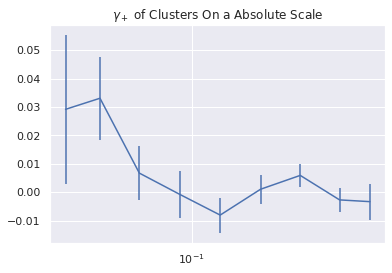

Aggregated xi:
[  0.      -2.7717  -9.5581  -3.7573   0.744   13.1471  -2.6354 -20.5413
  10.5564   4.7843]
------------------------------------------------------------------------------
Aggregated meanlogr:
[    0.      -360.5957  -979.1802 -1630.8177 -2310.3197 -3214.4446
 -3737.8224 -3533.3576 -2165.7855  -280.9203]
------------------------------------------------------------------------------
Aggregated npairs:
[   0.   95.  289.  558.  946. 1635. 2511. 3468. 3914. 1444.]
------------------------------------------------------------------------------
Mean xi:
[    nan -0.0292 -0.0331 -0.0067  0.0008  0.008  -0.001  -0.0059  0.0027
  0.0033]
------------------------------------------------------------------------------
Mean meanlogr:
[    nan -3.7957 -3.3882 -2.9226 -2.4422 -1.966  -1.4886 -1.0188 -0.5533
 -0.1945]
------------------------------------------------------------------------------


In [25]:
plt_w_error(mean_abs[1],-mean_abs[0],sig_abs,r"$\gamma_+$ of Clusters On a Absolute Scale ")
print_data(sum_abs,mean_abs)

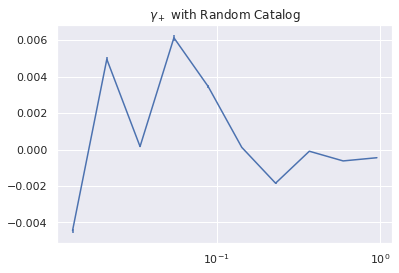

[-4.4456e-03  4.9577e-03  1.6617e-04  6.1347e-03  3.4647e-03  1.2124e-04
 -1.8462e-03 -9.1859e-05 -6.2345e-04 -4.4764e-04]
[ 1.1198e-04 -1.2488e-04 -4.1857e-06 -1.5453e-04 -8.7274e-05 -3.0541e-06
  4.6504e-05  2.3139e-06  1.5704e-05  1.1276e-05]


In [26]:
plt_w_error(r_meanlogr,-r_xi,r_sigma,r"$\gamma_+$ with Random Catalog")
print(-r_xi)
print(r_sigma)

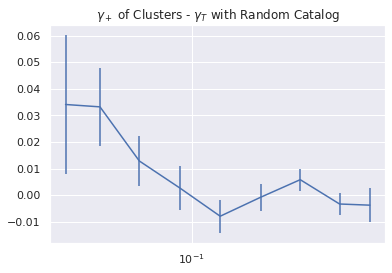

In [27]:
plt_w_error(mean_abs[1],-(mean_abs[0]+r_xi),np.hypot(r_sigma,sig_abs),r"$\gamma_+$ of Clusters - $\gamma_T$ with Random Catalog")

# Rel plots

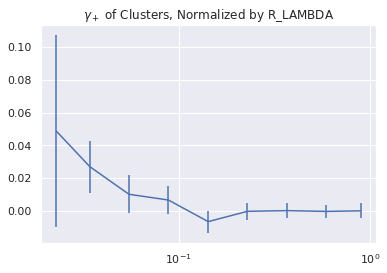

Aggregated xi:
[ 0.     -1.3164 -6.2015 -4.6696 -5.223   8.536   0.1551 -1.1502  0.4989
 -0.6613]
------------------------------------------------------------------------------
Aggregated meanlogr:
[    0.      -101.83    -771.4677 -1313.3313 -1862.4935 -2627.1678
 -3176.7248 -3189.3546 -2078.5959  -326.7734]
------------------------------------------------------------------------------
Aggregated npairs:
[   0.   27.  229.  453.  768. 1349. 2150. 3182. 3919. 2783.]
------------------------------------------------------------------------------
Mean xi:
[        nan -4.8756e-02 -2.7081e-02 -1.0308e-02 -6.8008e-03  6.3277e-03
  7.2152e-05 -3.6146e-04  1.2730e-04 -2.3761e-04]
------------------------------------------------------------------------------
Mean meanlogr:
[    nan -3.7715 -3.3689 -2.8992 -2.4251 -1.9475 -1.4775 -1.0023 -0.5304
 -0.1174]
------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

In [28]:
plt_w_error(mean_rel[1],-mean_rel[0],sig_rel,r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA")
print_data(sum_rel,mean_rel)